# Generating Figures

###### Scope: Our project is to uncover data trends among all star MLB pitchers from 2016-2021. We will examine relationships between their strikeout %, ERA (earned run average) , BB (walk)%, in their all star seasons, as well as some of their physical dimensions and place of birth (state if domestic, country if foreign born).

In [23]:
import pandas as pd
import requests
import json
from pprint import pprint
import csv
from matplotlib import pyplot as plt
import numpy as np

In [7]:
fpath1 = 'Resources/roster_and_stats_merged.csv'
fpath2 = 'Resources/dimensions_dict.csv'

allstar_df = pd.read_csv(fpath1)
allstar_df

league_df = pd.read_csv(fpath2)
league_df

# Grabbing csv data generated in 'Cleaning DataFrames.ipynb'
stats_df = pd.read_csv(fpath1,index_col=0)
players_df = pd.read_csv(fpath2,index_col=0)


In [8]:
stats_df.head()

,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047
1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106
2,2019,Gerrit Cole,colege01,28.0,2.50,185.0,0.399,0.059
3,2019,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081
4,2019,Shane Greene,greensh02,30.0,2.30,207.0,0.254,0.068


In [10]:
players_df.head(2)

,position,birth_country,weight,birth_state,name_display_first_last,college,height_inches,name_display_roster,sport_code,bats,...,league,name_display_last_first,position_id,high_school,name_use,player_id,name_last,team_id,service_years,active_sw
0,P,USA,200,CA,Shane Bieber,UC Santa Barbara,3,Bieber,mlb,R,...,AL,"Bieber, Shane",1,"Laguna Hills, CA",Shane,669456,Bieber,114,NaN,Y
1,P,Cuba,218,NaN,Aroldis Chapman,NaN,4,"Chapman, A",mlb,L,...,AL,"Chapman, Aroldis",1,NaN,Aroldis,547973,Chapman,147,NaN,Y


<AxesSubplot:title={'center':'All Star Players by Birth Country\n2015-2019'}, xlabel='Country', ylabel='Number of Players'>

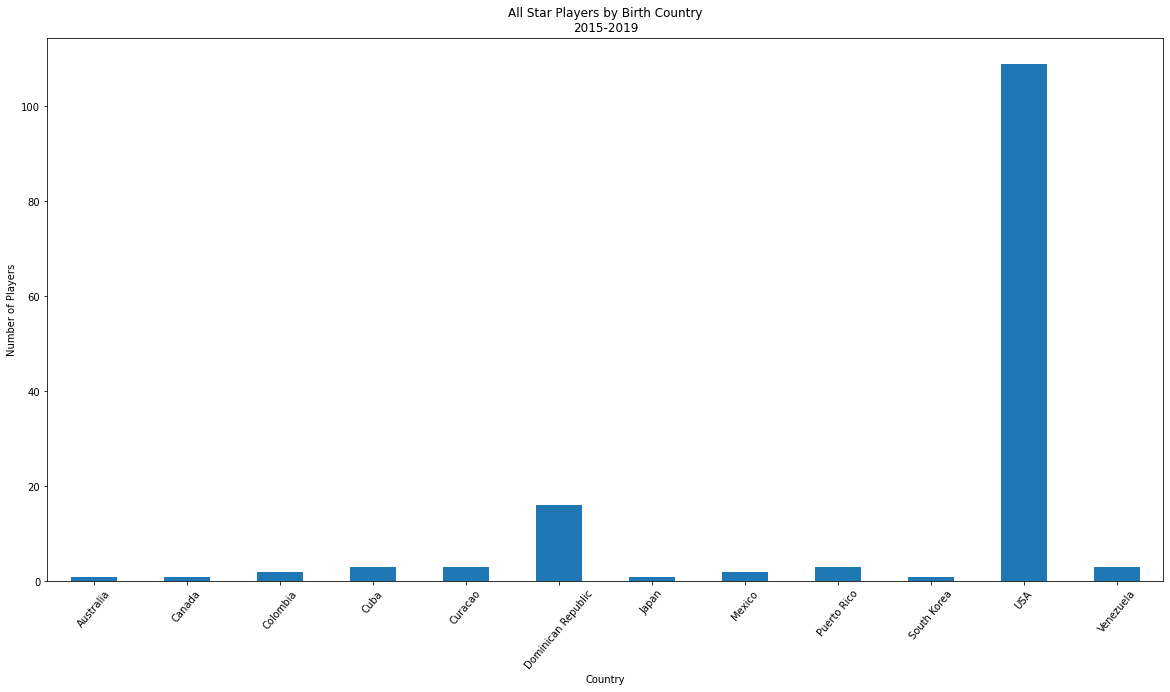

In [11]:
# Creating group based on country
country_grp = players_df.groupby(['birth_country'])['birth_country'].count()

# Plot Country group data
country_grp.plot(kind='bar',title='All Star Players by Birth Country\n2015-2019',
                 xlabel='Country',ylabel='Number of Players',rot=50,figsize=(20,10))

# Commented-out to prevent regenerating file
# plt.savefig('Images/as_player_country.png')

<AxesSubplot:title={'center':'All Star Players by Birth State\n2015-2019'}, xlabel='State', ylabel='Number of Players'>

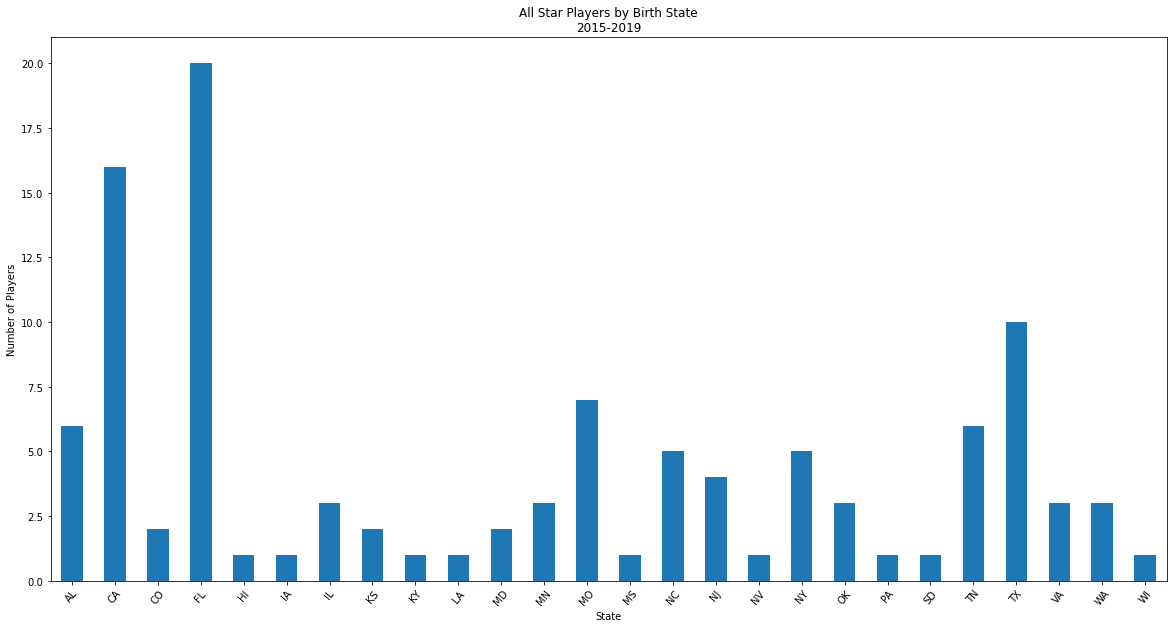

In [12]:
# Filtering for USA born players, and grouping by state
as_us = players_df[players_df['birth_country']=='USA']
state_grp = as_us.groupby(["birth_state"])['birth_state'].count()

# Plot State data
state_grp.plot(kind='bar',title='All Star Players by Birth State\n2015-2019',
                 xlabel='State',ylabel='Number of Players',rot=50,figsize=(20,10))

# Commented-out to prevent regenerating file
# plt.savefig('Images/as_player_state.png')

<AxesSubplot:xlabel='Height', ylabel='ERA+'>

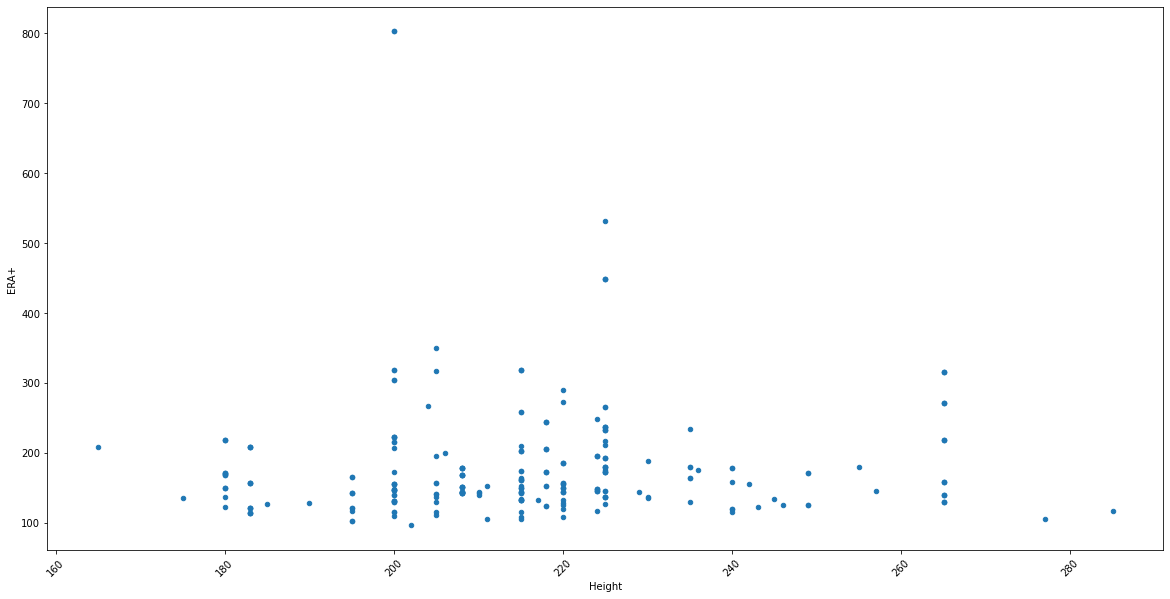

In [13]:
# Merge player dimensions into statistic dataframe
by_weight = pd.merge(players_df,stats_df,how='left',left_on='name_display_first_last',right_on='Player Name')

# Plot ERA+ against weight
by_weight.plot('weight','ERA+',kind='scatter',rot=45,figsize=(20,10),xlabel='Height')


# Commented-out to prevent regenerating file
# plt.savefig('Images/as_player_weight.png')


Part 2

In [14]:
fpath3 = 'Resources/league_stats.csv'

In [16]:
# Generating allstar dataframe
allstar_df = pd.read_csv(fpath1)

# Generating league-wide dataframe
league_df = pd.read_csv(fpath3)

In [29]:
allstar_df

,Unnamed: 0,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
0,0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047
1,1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106
2,2,2019,Gerrit Cole,colege01,28.0,2.50,185.0,0.399,0.059
3,3,2019,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081
4,4,2019,Shane Greene,greensh02,30.0,2.30,207.0,0.254,0.068
...,...,...,...,...,...,...,...,...,...
147,147,2015,Darren O'Day,odayda01,32.0,1.52,272.0,0.319,0.055
148,148,2015,Glen Perkins,perkigl01,32.0,3.32,123.0,0.227,0.042
149,149,2015,David Price,priceda01,29.0,2.45,164.0,0.253,0.053
150,150,2015,Chris Sale,salech01,26.0,3.41,114.0,0.321,0.049


In [30]:
league_df

,Unnamed: 0,Player Name,Shortname,Year,Age,ERA,ERA+,K%,BB%
0,736,Austin Voth,vothau01,2019,27,3.30,134.0,0.253,0.075
1,737,Wander Suero,suerowa01,2019,27,4.54,97.0,0.274,0.088
2,738,Stephen Strasburg,strasst01,2019,30,3.32,133.0,0.299,0.067
3,739,Tony Sipp,sippto01,2019,35,4.71,95.0,0.196,0.098
4,740,Max Scherzer,scherma01,2019,34,2.92,151.0,0.351,0.048
...,...,...,...,...,...,...,...,...,...
3076,4592,Jonathan Broxton,broxtjo01,2015,31,4.62,86.0,0.245,0.086
3077,4593,Aaron Brooks,brookaa01,2015,25,6.67,60.0,0.152,0.056
3078,4594,Matthew Boyd,boydma01,2015,24,7.53,54.0,0.171,0.079
3079,4595,Joe Blanton,blantjo01,2015,34,2.84,143.0,0.256,0.052


In [19]:
# Grouping All-Stars by year to summarize statistical trends
allstar_year_group = allstar_df.groupby('Year')
allstar_year_mean = allstar_year_group.mean()
allstar_year_df = pd.DataFrame(allstar_year_mean)
allstar_year_df = allstar_year_df.reset_index()
allstar_year_df.head(2)

,Year,Unnamed: 0,Age,ERA,ERA+,K%,BB%
0,2015,137.0,28.000000,2.558929,171.464286,0.266857,0.068929
1,2016,105.5,28.970588,2.735000,178.176471,0.279765,0.073353


In [21]:
# Grouping League by year to summarize statistical trends
league_year_group = league_df.groupby('Year')
league_year_mean = league_year_group.mean()
league_year_df = pd.DataFrame(league_year_mean)
league_year_df = league_year_df.reset_index()
league_year_df.head(2)

,Year,Unnamed: 0,Age,ERA,ERA+,K%,BB%
0,2015,4234.953177,28.056856,4.398278,108.919732,0.200978,0.084224
1,2016,3495.301003,27.884615,4.813110,108.411371,0.207579,0.088719


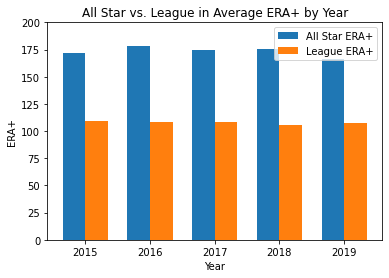

In [24]:
# Defining stats to include in plot
a = 'Year'
b = 'ERA+'

labels_year = league_year_df[a].tolist()
star_ERA = allstar_year_df[b].tolist()
league_ERA = league_year_df[b].tolist()


x = np.arange(len(labels_year))  # the label locations
width = 0.35  # the width of the bars

# Building Bar plots of data
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, star_ERA, width, label=f'All Star {b}')
rects2 = ax.bar(x + width/2, league_ERA, width, label=f'League {b}')

plt.legend()
plt.xticks(np.arange(5), labels=labels_year)
plt.title(f'All Star vs. League in Average {b} by Year')
plt.xlabel(f'{a}')
plt.ylabel(f'{b}')
plt.ylim((0,200))

plt.show()

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_vs_League_ERA+.png',dpi=400)

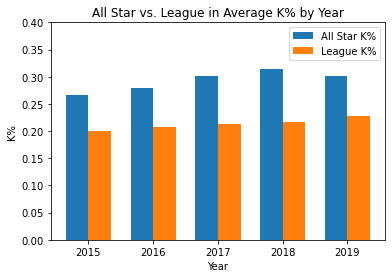

In [25]:
# Defining stats to include in plot
a = 'Year'
b = 'K%'

labels_year = league_year_df[a].tolist()
star_K = allstar_year_df[b].tolist()
league_K = league_year_df[b].tolist()

x = np.arange(len(labels_year))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, star_K, width, label=f'All Star {b}')
rects2 = ax.bar(x + width/2, league_K, width, label=f'League {b}')

plt.legend()
plt.xticks(np.arange(5), labels=labels_year)
plt.title(f'All Star vs. League in Average {b} by Year')
plt.xlabel(f'{a}')
plt.ylabel(f'{b}')
plt.ylim((0,0.4))

plt.show()

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_vs_League_K%.png',dpi=400)

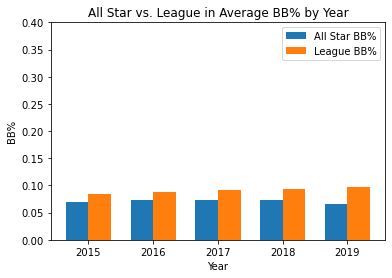

In [26]:
# Defining stats to include in plot
a = 'Year'
b = 'BB%'

labels_year = league_year_df[a].tolist()
star_BB = allstar_year_df[b].tolist()
league_BB = league_year_df[b].tolist()

x = np.arange(len(labels_year))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, star_BB, width, label=f'All Star {b}')
rects2 = ax.bar(x + width/2, league_BB, width, label=f'League {b}')

plt.legend()
plt.xticks(np.arange(5), labels=labels_year)
plt.title(f'All Star vs. League in Average {b} by Year')
plt.xlabel(f'{a}')
plt.ylabel(f'{b}')
plt.ylim((0,0.4))

plt.show()

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_vs_League_BB%.png',dpi=400)

Text(0, 0.5, 'ERA+')

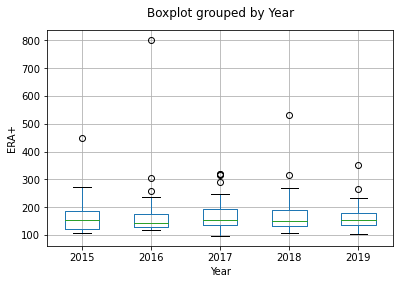

In [43]:
# Generating box plot of ERA data
fig = allstar_df.boxplot("ERA+", by="Year")
fig.set_title('')
fig.set_ylabel('ERA+')

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_ERA+_Boxplot.png',dpi=400)

In [46]:
# Cleaning up 'dimensions_dict.csv' data set to display height and weight
dimensions = pd.read_csv(fpath2)
dimensions2 = dimensions.iloc[:,[1,2,3,4,5,6,7,11,26,12,14,16]]
dimensions3 = dimensions2.iloc[:,[4,2,10,6,1,3,11]]
dimensions3.head(2)

,name_display_first_last,weight,height_feet,height_inches,birth_country,birth_state,team_full
0,Shane Bieber,200,6,3,USA,CA,Cleveland Indians
1,Aroldis Chapman,218,6,4,Cuba,NaN,New York Yankees


In [48]:
# Additional cleaning to get height and weight
height_df = dimensions3.copy()

# Convert height into single dimension (inches)
height_df['height'] = height_df['height_feet']*12+height_df['height_inches']
height_df = height_df.rename(columns={"name_display_first_last": "Player Name"})

# Filtering out extra columns
height_df = height_df.iloc[:,[0,1,7]]
height_df

,Player Name,weight,height
0,Shane Bieber,200,75
1,Aroldis Chapman,218,76
2,Gerrit Cole,220,76
3,Lucas Giolito,245,78
4,Shane Greene,200,76
...,...,...,...
140,Kelvin Herrera,220,70
141,Darren O'Day,220,76
142,David Price,215,77
143,Chris Sale,183,78


In [51]:
# Merging the player dimensions into the allstar dataframe
# Cleaning duplicates and NA values
merge_dim = pd.merge(height_df,allstar_df,left_on='Player Name', right_on='Player Name',how ='left')
merge_dim = merge_dim.drop_duplicates()
merge_dim = merge_dim.dropna()
merge_dim.head(2)

,Player Name,weight,height,Unnamed: 0,Year,Shortname,Age,ERA,ERA+,K%,BB%
0,Shane Bieber,200,75,0.0,2019.0,biebesh01,24.0,3.28,147.0,0.302,0.047
1,Aroldis Chapman,218,76,1.0,2019.0,chapmar01,31.0,2.21,206.0,0.362,0.106


Text(72, 250, 'y = -7x + 677.47')

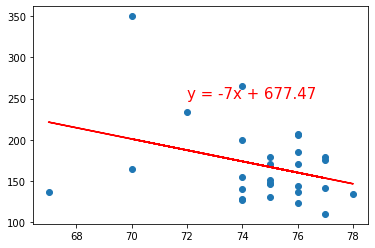

In [52]:
ht_2019 = merge_dim.loc[merge_dim['Year'] == 2019,:]
from scipy.stats import linregress

x_values = ht_2019['height']
y_values = ht_2019['ERA+']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_ERA+_Boxplot.png',dpi=400)

Text(72, 250, 'y = 2x + 12.94')

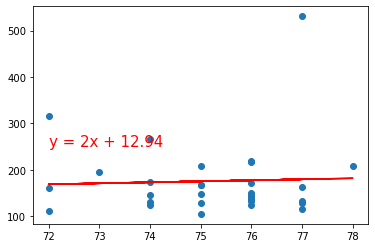

In [53]:
ht_2018 = merge_dim.loc[merge_dim['Year'] == 2018,:]
x_values = ht_2018['height']
y_values = ht_2018['ERA+']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_ERA+_Boxplot.png',dpi=400)

Text(72, 250, 'y = 8x + -456.63')

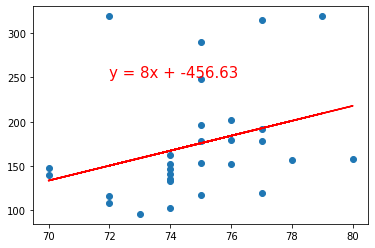

In [54]:
ht_2017 = merge_dim.loc[merge_dim['Year'] == 2017,:]
x_values = ht_2017['height']
y_values = ht_2017['ERA+']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_ERA+_Boxplot.png',dpi=400)

Text(72, 250, 'y = 1x + 133.32')

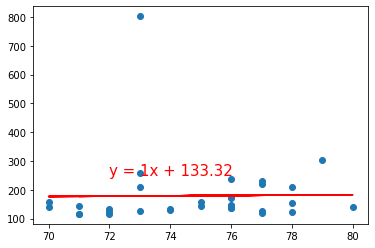

In [55]:
ht_2016 = merge_dim.loc[merge_dim['Year'] == 2016,:]
x_values = ht_2016['height']
y_values = ht_2016['ERA+']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_ERA+_Boxplot.png',dpi=400)

Text(72, 250, 'y = 10x + -602.71')

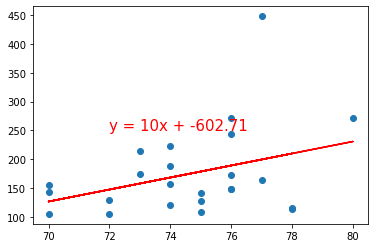

In [56]:
ht_2015 = merge_dim.loc[merge_dim['Year'] == 2015,:]
x_values = ht_2015['height']
y_values = ht_2015['ERA+']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(72,250),fontsize=15,color="red")

# Commented-out to prevent regenerating file
# plt.savefig('Images/Allstar_ERA+_Boxplot.png',dpi=400)